# **SpaceX  Falcon 9 First Stage Landing Prediction**
## Data Visualization , EDA and Data Feature Engineering




## Objectives

We perform exploratory Data Analysis and Feature Engineering using `Pandas` and `Matplotlib`

*   Exploratory Data Analysis
*   Preparing Data  Feature Engineering


### Our Libraries and Auxiliary Functions


In [6]:
# pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
#NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns

## Exploratory Data Analysis


Viewing our dataset


In [7]:
df=pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv")
df.head(5)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


First, let's try to see how the `FlightNumber` (indicating the continuous launch attempts.) and `Payload` variables would affect the launch outcome.

We can plot out the <code>FlightNumber </code> vs. <code>PayloadMass </code>and overlay the outcome of the launch. We see that as the flight number increases, the first stage is more likely to land successfully. The payload mass is also important; it seems the more massive the payload, the less likely the first stage will return.


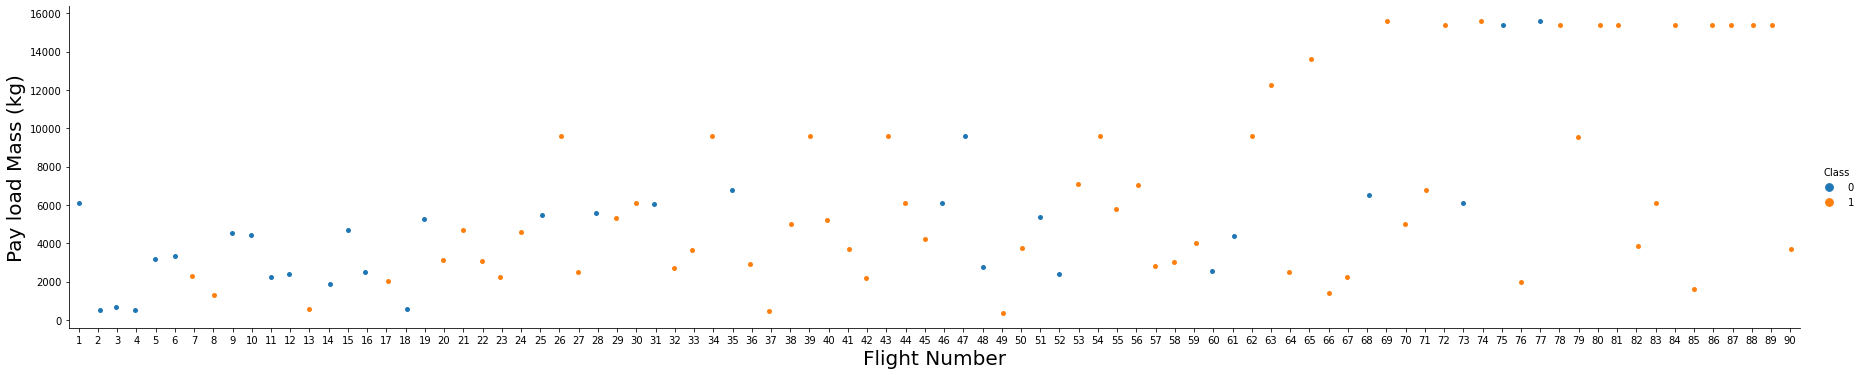

In [9]:
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

We see that different launch sites have different success rates.  <code>CCAFS LC-40</code>, has a success rate of 60 %, while  <code>KSC LC-39A</code> and <code>VAFB SLC 4E</code> has a success rate of 77%.


### Relationship between Flight Number and Launch Site


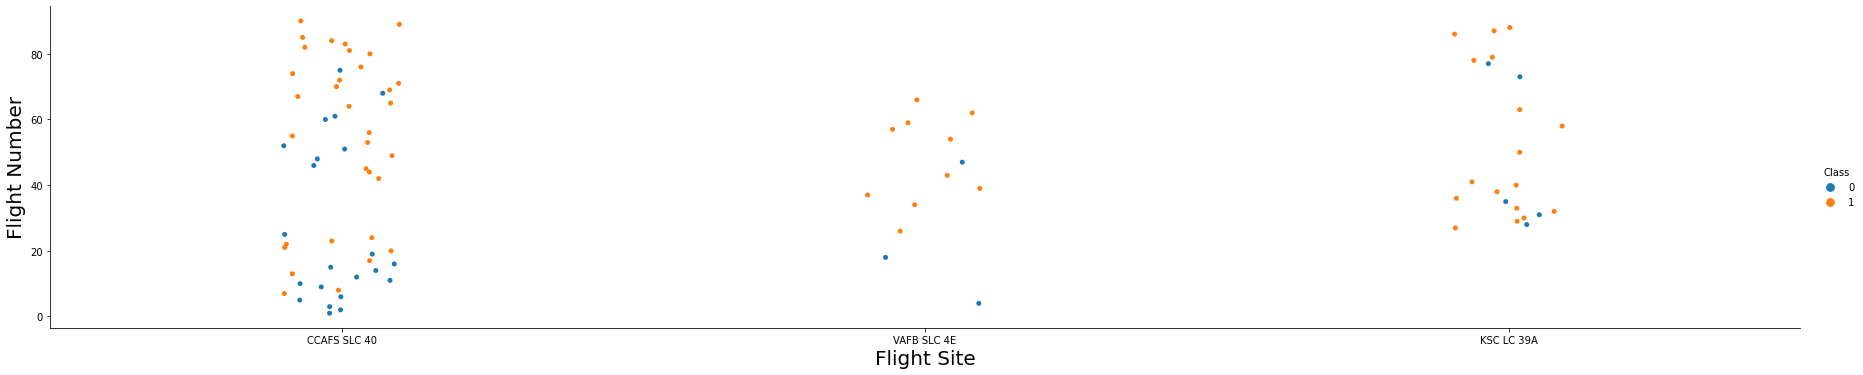

In [10]:
sns.catplot(y="FlightNumber", x="LaunchSite", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Site",fontsize=20)
plt.ylabel("Flight Number",fontsize=20)
plt.show()

The more amount of flights at a launch site the greater the success rate at a launch site.

### The relationship between Payload and Launch Site

We also want to observe if there is any relationship between launch sites and their payload mass.



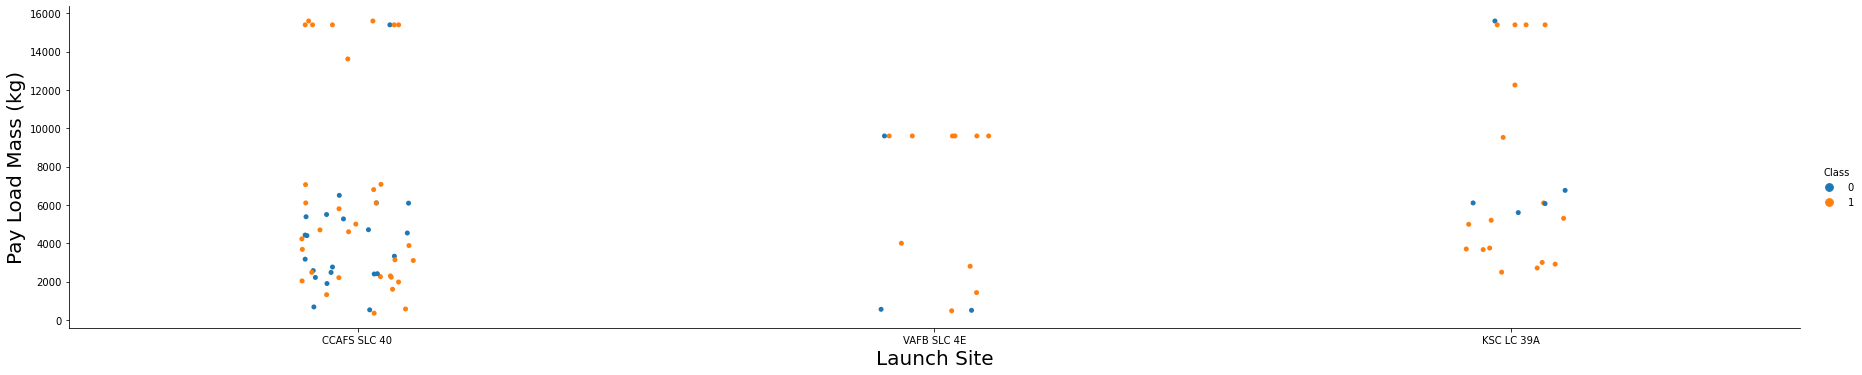

In [11]:
sns.catplot(y="PayloadMass",x="LaunchSite",hue ="Class",data=df,aspect= 5)
plt.xlabel("Launch Site",fontsize=20)
plt.ylabel("Pay Load Mass (kg)",fontsize=20)
plt.show()

The greater the payload mass for Launch Site CCAFS SLC 40 the higher the success rate for the Rocket.

There is not quite a clear pattern to be found using this visualization to make a decision if the Launch Site is dependant on Pay Load Mass for a success launch. 

### Relationship between success rate of each orbit type
We want to visually check if there are any relationship between success rate and orbit type.


In [12]:
df.groupby(['Orbit']).mean() 

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Longitude,Latitude,Class
Orbit,,,,,,,,,,,
ES-L1,13.000000,570.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,-80.577366,28.561857,1.000000
GEO,83.000000,6104.959412,2.000000,1.000000,1.000000,1.000000,5.000000,2.000000,-80.577366,28.561857,1.000000
GTO,35.037037,5011.994444,1.407407,0.629630,0.333333,0.629630,3.037037,0.962963,-80.586229,28.577258,0.518519
HEO,49.000000,350.000000,1.000000,1.000000,0.000000,1.000000,4.000000,1.000000,-80.577366,28.561857,1.000000
ISS,39.142857,3279.938095,1.238095,0.809524,0.238095,0.857143,3.142857,1.285714,-80.583697,28.572857,0.619048
LEO,20.000000,3882.839748,1.000000,0.571429,0.000000,0.714286,2.142857,0.428571,-80.584963,28.575058,0.714286
MEO,77.666667,3987.000000,1.000000,0.666667,0.000000,0.666667,5.000000,0.666667,-80.577366,28.561857,0.666667
PO,36.333333,7583.666667,1.333333,0.888889,0.333333,0.777778,3.222222,1.555556,-120.610829,34.632093,0.666667
SO,73.000000,6104.959412,4.000000,0.000000,1.000000,0.000000,5.000000,3.000000,-80.603956,28.608058,0.000000


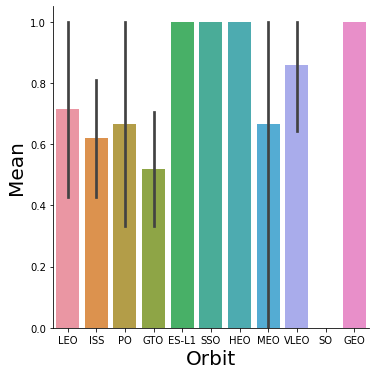

In [13]:
sns.catplot(x="Orbit",y="Class", kind="bar",data=df)
plt.xlabel("Orbit",fontsize=20)
plt.ylabel("Mean",fontsize=20)
plt.show()

Orbit GEO,HEO,SSO,ES-L1 has the best Success Rate


### Relationship between FlightNumber and Orbit type


For each orbit, we want to see if there is any relationship between FlightNumber and Orbit type.


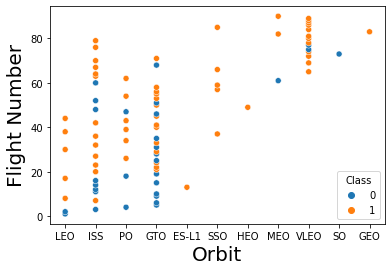

In [14]:
sns.scatterplot(x="Orbit",y="FlightNumber",hue="Class",data = df)
plt.xlabel("Orbit",fontsize=20)
plt.ylabel("Flight Number",fontsize=20)
plt.show()

You should see that in the LEO orbit the Success appears related to the number of flights; on the other hand, there seems to be no relationship between flight number when in GTO orbit.


### Relationship between Payload and Orbit type


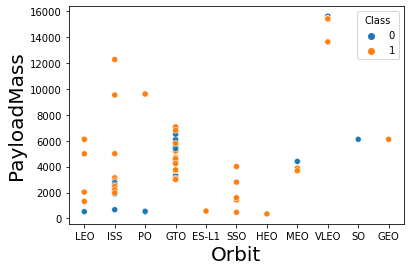

In [15]:
sns.scatterplot(x="Orbit",y="PayloadMass",hue="Class",data = df)
plt.xlabel("Orbit",fontsize=20)
plt.ylabel("PayloadMass",fontsize=20)
plt.show()

You should observe that Heavy payloads have a negative influence on GTO orbits and positive on GTO and Polar LEO (ISS) orbits.


### Launch Success Yearly Trend


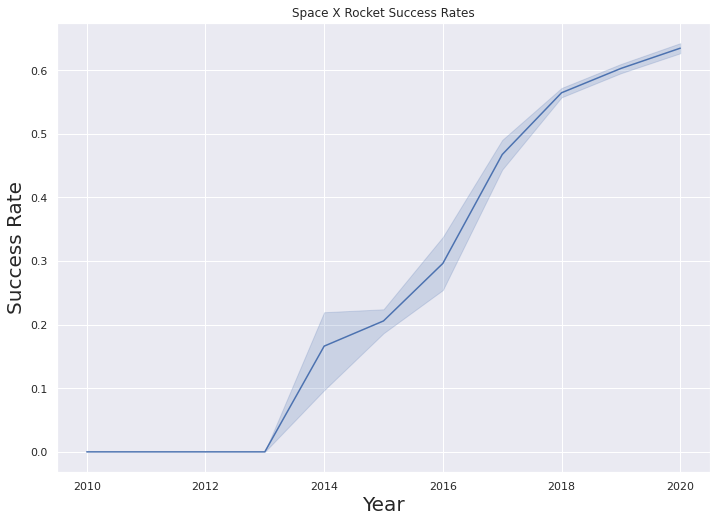

In [16]:
year = pd.DatetimeIndex(df['Date']).year
year = np.array(list(year))
successratelist = []
successrate = 0.00
records = 1
data = 0
for x in df['Class']:
    data = x + data
    successrate = data/records
    successratelist.append(successrate)
    records= records +1
    
successratelist = np.array(successratelist)
d = {'successrate':successratelist,'year':year}
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.lineplot(data=d, x="year", y="successrate" )

plt.xlabel("Year",fontsize=20)
plt.title('Space X Rocket Success Rates')
plt.ylabel("Success Rate",fontsize=20)
plt.show()

you can observe that the success rate since 2013 kept increasing till 2020


## Features Engineering


In [17]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6104.959412,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


In [20]:
features_hot = df[['Orbit','LaunchSite','LandingPad','Serial']].copy()
features_hot['Orbit'] = pd.get_dummies(df['Orbit'])
features_hot['LaunchSite'] = pd.get_dummies(df['LaunchSite'])
features_hot['LandingPad'] = pd.get_dummies(df['LandingPad'])
features_hot['Serial'] = pd.get_dummies(df['Serial'])
features_hot.head()

,Orbit,LaunchSite,LandingPad,Serial
0,0,1,0,1
1,0,1,0,0
2,0,1,0,0
3,0,0,0,0
4,0,1,0,0


In [23]:
features_hot.astype('float64')
features_hot

,Orbit,LaunchSite,LandingPad,Serial
0,0,1,0,1
1,0,1,0,0
2,0,1,0,0
3,0,0,0,0
4,0,1,0,0
...,...,...,...,...
85,0,0,0,0
86,0,0,0,0
87,0,0,0,0
88,0,1,0,0
